**This is dataset**

In [ ]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("accelotron/nsynth-wav")
""
print("Path to dataset files:", path)

 47%|████▋     | 11.0G/23.3G [01:59<01:40, 132MB/s]

**Meilstone-1**

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

BASE_PATH = "/kaggle/input/nsynth-wav"
AUDIO_PATH = None

for root, dirs, files in os.walk(BASE_PATH):
    if root.lower().endswith("audio"):
        AUDIO_PATH = root
        break

if AUDIO_PATH is None:
    raise FileNotFoundError("NSynth audio folder not found")

print(" Audio folder found:", AUDIO_PATH)

OUTPUT_PATH = "spectrograms"
os.makedirs(OUTPUT_PATH, exist_ok=True)

INSTRUMENTS = ["piano", "guitar", "bass", "flute", "organ"]
MAX_FILES = 2000
count = {inst: 0 for inst in INSTRUMENTS}


def create_mel_spectrogram(wav_path, save_path):
    y, sr = librosa.load(wav_path, sr=22050, duration=3)

    mel = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_mels=64,
        n_fft=2048,
        hop_length=512
    )

    mel_db = librosa.power_to_db(mel, ref=np.max)

    plt.figure(figsize=(2.5, 2.5))
    librosa.display.specshow(mel_db)
    plt.axis("off")
    plt.savefig(save_path, bbox_inches="tight", pad_inches=0)
    plt.close()

for file in os.listdir(AUDIO_PATH):

    if not file.endswith(".wav"):
        continue

    fname = file.lower()

    for inst in INSTRUMENTS:
        if inst in fname and count[inst] < MAX_FILES:

            inst_dir = os.path.join(OUTPUT_PATH, inst)
            os.makedirs(inst_dir, exist_ok=True)

            input_file = os.path.join(AUDIO_PATH, file)
            output_file = os.path.join(
                inst_dir, file.replace(".wav", ".png")
            )

            create_mel_spectrogram(input_file, output_file)
            count[inst] += 1
            break

print("\n Milestone-1 Completed")
for k, v in count.items():
    print(f"{k} : {v}")

 Audio folder found: /kaggle/input/nsynth-wav/nsynth-train-all/audio

 Milestone-1 Completed
piano : 0
guitar : 2000
bass : 2000
flute : 2000
organ : 2000


In [ ]:
import os

BASE = "spectrograms"

for cls in os.listdir(BASE):
    cls_path = os.path.join(BASE, cls)
    print(f"\n📁 {cls}  →  {len(os.listdir(cls_path))} files")


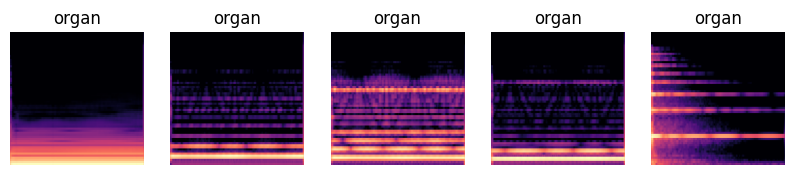

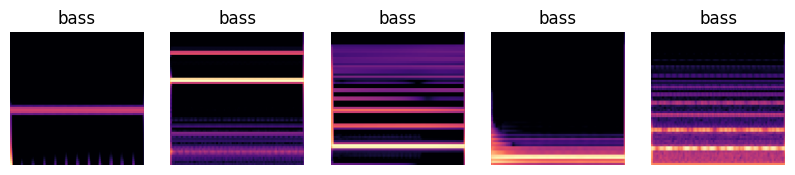

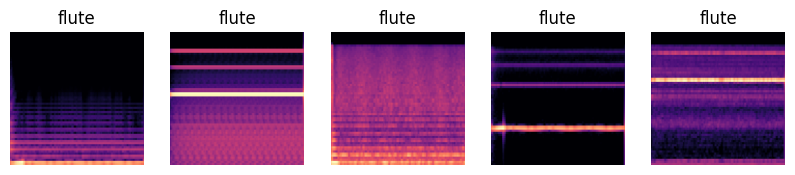

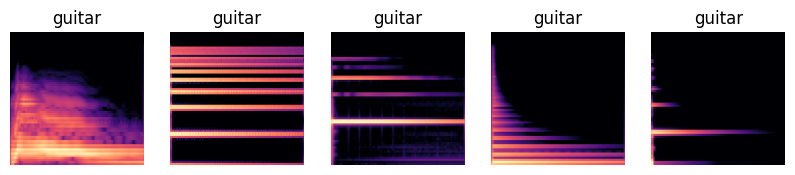

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

BASE = "spectrograms"

for cls in os.listdir(BASE):

    cls_path = os.path.join(BASE, cls)
    images = random.sample(os.listdir(cls_path), 5)

    plt.figure(figsize=(10,2))
    for i, img in enumerate(images):
        plt.subplot(1,5,i+1)
        plt.imshow(Image.open(os.path.join(cls_path, img)))
        plt.title(cls)
        plt.axis("off")

    plt.show()


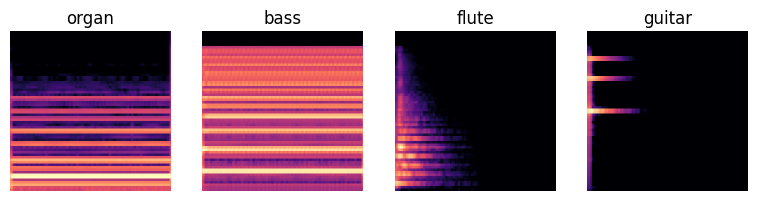

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

BASE = "spectrograms"

plt.figure(figsize=(12,4))
i = 1

for cls in os.listdir(BASE):
    cls_path = os.path.join(BASE, cls)
    img = os.listdir(cls_path)[0]

    plt.subplot(1,5,i)
    plt.imshow(Image.open(os.path.join(cls_path, img)))
    plt.title(cls)
    plt.axis("off")
    i += 1

plt.show()


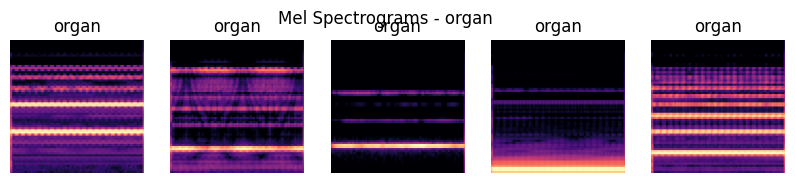

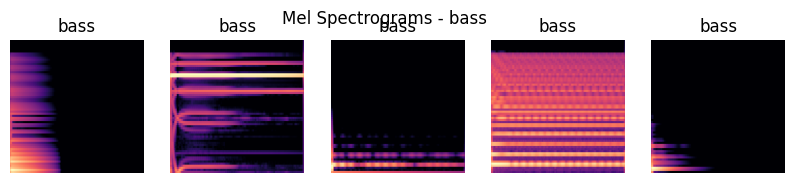

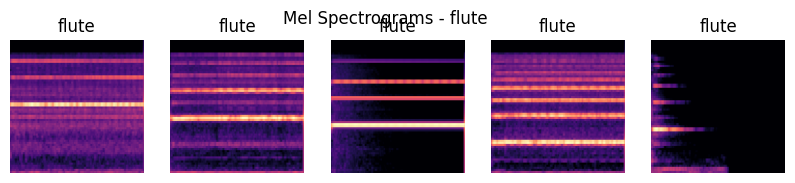

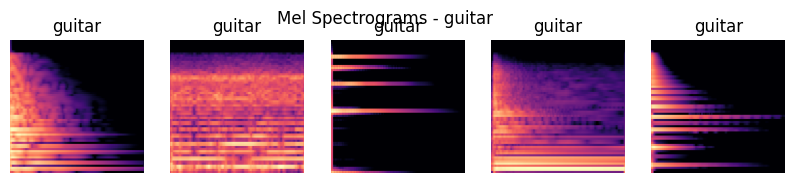

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

BASE = "spectrograms"   # same folder used in training

for cls in os.listdir(BASE):
    cls_path = os.path.join(BASE, cls)
    images = random.sample(os.listdir(cls_path), 5)

    plt.figure(figsize=(10,2))
    for i, img in enumerate(images):
        plt.subplot(1,5,i+1)
        plt.imshow(Image.open(os.path.join(cls_path, img)))
        plt.title(cls)
        plt.axis("off")

    plt.suptitle(f"Mel Spectrograms - {cls}")
    plt.show()


**meilstone-2**

Found 6400 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.
 Classes: {'bass': 0, 'flute': 1, 'guitar': 2, 'organ': 3}


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 94, 94, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 47, 47, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 45, 45, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 20, 20, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 843,428 (3.22 MB)

 Trainable params: 843,428 (3.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 66s 152ms/step - accuracy: 0.4977 - loss: 1.1136 - val_accuracy: 0.7119 - val_loss: 0.6469
Epoch 2/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 61s 152ms/step - accuracy: 0.7254 - loss: 0.6905 - val_accuracy: 0.7556 - val_loss: 0.6226
Epoch 3/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 60s 149ms/step - accuracy: 0.7706 - loss: 0.5517 - val_accuracy: 0.7638 - val_loss: 0.6486
Epoch 4/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 60s 150ms/step - accuracy: 0.8124 - loss: 0.4750 - val_accuracy: 0.7788 - val_loss: 0.5411
Epoch 5/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 65s 162ms/step - accuracy: 0.8287 - loss: 0.4149 - val_accuracy: 0.7819 - val_loss: 0.6173
Epoch 6/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 59s 148ms/step - accuracy: 0.8428 - loss: 0.3870 - val_accuracy: 0.7763 - val_loss: 0.6696
Epoch 7/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 58s 146ms/step - accuracy: 0.8710 - loss: 0.3170 - val_accuracy: 0.7900 - val_loss: 0.5805
Epoch 8/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 59s 148ms/step - accuracy: 0.8825 - loss: 0

✅ Model saved


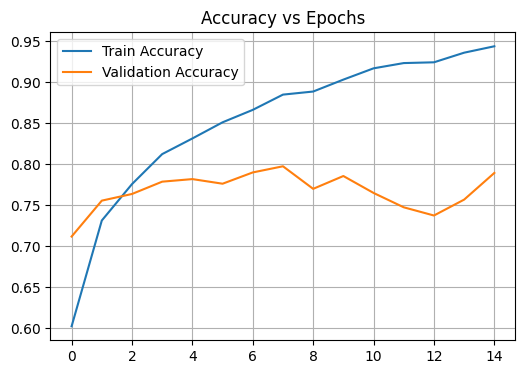

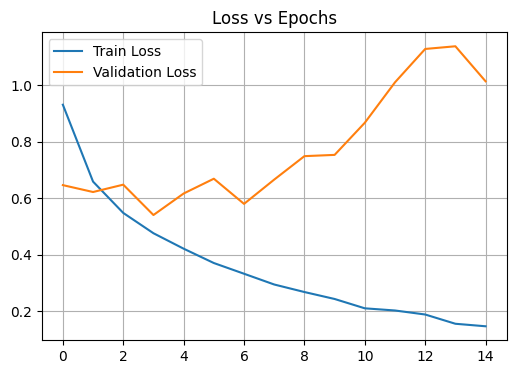

Milestone-2 Completed


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATA_PATH = "spectrograms"
# CONFIG (10GB RAM SAFE)

IMG_SIZE = (96,96)
BATCH_SIZE = 16
EPOCHS = 15
# DATA GENERATOR
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATA_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    DATA_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

NUM_CLASSES = train_data.num_classes
print(" Classes:", train_data.class_indices)


model = Sequential([
    Input(shape=(96,96,3)),

    Conv2D(16, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()
# TRAIN
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)

model.save("instrument_cnn_model.h5")
print("✅ Model saved")
# GRAPHS
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy vs Epochs")
plt.grid()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss vs Epochs")
plt.grid()
plt.show()

print("Milestone-2 Completed")


**meilstone-3**

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss

# LOAD MODEL
model = load_model("instrument_cnn_model.h5")

# LOAD DATA
datagen = ImageDataGenerator(rescale=1./255)

data = datagen.flow_from_directory(
    "spectrograms",
    target_size=(96,96),
    batch_size=16,
    class_mode="categorical",
    shuffle=False
)

y_true = data.classes
y_prob = model.predict(data)
y_pred = np.argmax(y_prob, axis=1)

# METRICS TABLE
results = pd.DataFrame({
    "Accuracy": [accuracy_score(y_true, y_pred)],
    "Precision": [precision_score(y_true, y_pred, average="weighted")],
    "Recall": [recall_score(y_true, y_pred, average="weighted")],
    "F1 Score": [f1_score(y_true, y_pred, average="weighted")],
    "MSE": [mean_squared_error(y_true, y_pred)],
    "MAE": [mean_absolute_error(y_true, y_pred)],
    "Log Loss": [log_loss(y_true, y_prob)]
}, index=["CNN Model"])

print("\n📊 FINAL EVALUATION TABLE\n")
print(results)


Found 8000 images belonging to 4 classes.
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step

📊 FINAL EVALUATION TABLE

           Accuracy  Precision  Recall  F1 Score     MSE      MAE  Log Loss
CNN Model     0.935   0.936106   0.935  0.935385  0.2905  0.13225  0.264195


Found 8000 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step


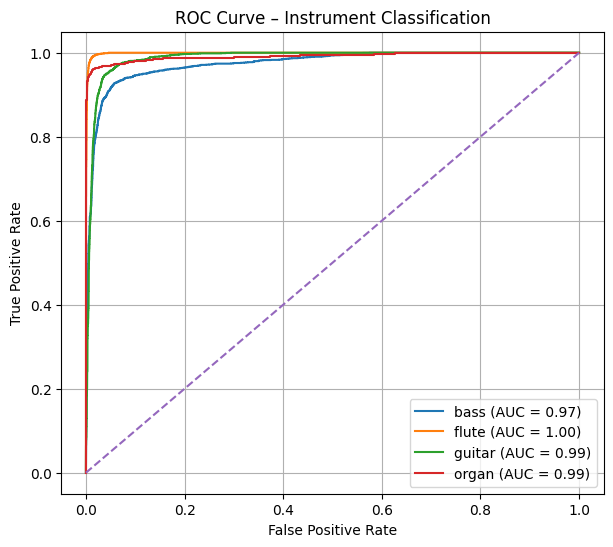

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load data again (no shuffle!)
datagen = ImageDataGenerator(rescale=1./255)

data = datagen.flow_from_directory(
    "spectrograms",
    target_size=(96,96),
    batch_size=16,
    class_mode="categorical",
    shuffle=False
)

y_true = data.classes
y_prob = model.predict(data)

n_classes = len(data.class_indices)
y_true_bin = label_binarize(y_true, classes=range(n_classes))

plt.figure(figsize=(7,6))

for i, class_name in enumerate(data.class_indices.keys()):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Instrument Classification")
plt.legend()
plt.grid()
plt.show()


**56**

Found 1600 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.7372 - loss: 1.2527
Test Loss: 1.0144684314727783
Test Accuracy: 0.7893750071525574
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step

Classification Report

              precision    recall  f1-score   support

        bass       0.63      0.64      0.64       400
       flute       0.92      0.97      0.95       400
      guitar       0.70      0.81      0.75       400
       organ       0.96      0.74      0.83       400

    accuracy                           0.79      1600
   macro avg       0.80      0.79      0.79      1600
weighted avg       0.80      0.79      0.79      1600



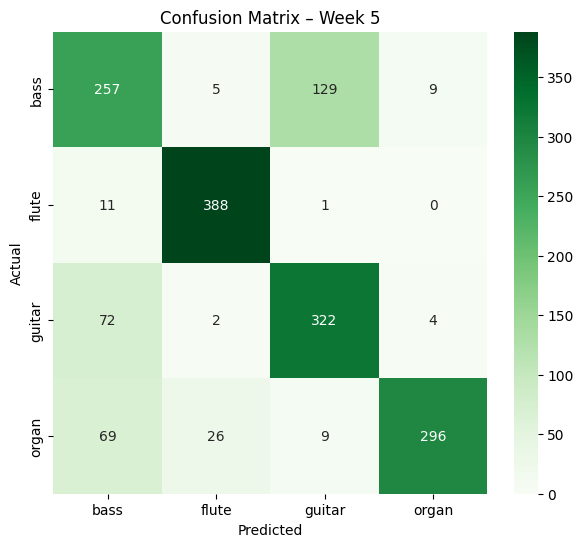

In [ ]:
# =========================
# WEEK 5 : MODEL EVALUATION
# =========================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load trained model (from Week 3–4)
model = load_model("instrument_cnn_model.h5")

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Load validation data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

test_data = datagen.flow_from_directory(
    "spectrograms",
    target_size=(96,96),
    batch_size=16,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

# Evaluate model
loss, acc = model.evaluate(test_data)
print("Test Loss:", loss)
print("Test Accuracy:", acc)

# Predictions
y_true = test_data.classes
y_prob = model.predict(test_data)
y_pred = np.argmax(y_prob, axis=1)

# Classification Report
print("\nClassification Report\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=test_data.class_indices.keys()
))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=test_data.class_indices.keys(),
    yticklabels=test_data.class_indices.keys()
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Week 5")
plt.show()
